Code Contributors : Niko Pedraza, Adam Torek, Carson Keller
Link Tensorflow Documentation(version=2.17): https://www.tensorflow.org/api_docs/python/tf

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Import Cifar100 dataset and normalize

In [25]:
#import cifar 100 which means it should have 10 classified/labels of image datasets
(train_images_cf100, train_labels_cf100), (test_images_cf100, test_labels_cf100) = cifar100.load_data()
print(train_images_cf100.shape, train_labels_cf100.shape, test_images_cf100.shape, test_labels_cf100.shape)

# (train_images, train_labels), (test_images, test_labels) = image.malaria.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images_cf100 / 255.0, test_images_cf100 / 255.0

#one hot encode the labels for increased efficency with big data set 
train_labels = to_categorical(train_labels_cf100)
test_labels = to_categorical(test_labels_cf100)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Getting Category Data

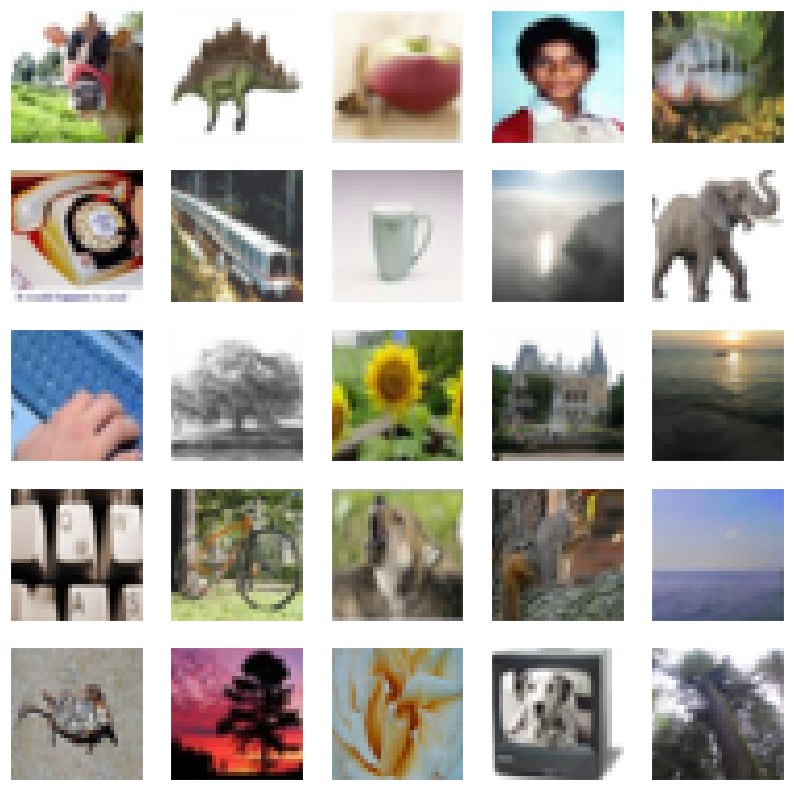

In [27]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    
plt.show()

In [28]:
input_shape = train_images_cf100.shape[1:]
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the base model to prevent it from being trained during the initial training process
base_model.trainable = False

C:\Users\pniko\AppData\Local\Temp\ipykernel_11464\145876638.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


In [29]:
#build on top of Mobilev2 
model  = models.Sequential()
model.add(base_model)


In [30]:
#adding layers to make it work 
# model.add(layers.GlobalAveragePooling2D())
# Add a dense layer with 100 units (since there are 100 classes in CIFAR-100) and softmax activation
# model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 100), output.shape=(None, 1, 1, 1280)